In [113]:
import pandas as pd
from PIL import Image, ImageEnhance

im = Image.open("images/7617.jpg")
converter = ImageEnhance.Color(im)
img2 = converter.enhance(4)

pix_val = list(img2.getdata())
pix = pd.DataFrame(pix_val, columns=['r', 'g', 'b'])

pixcm = pix.apply(lambda x: sRGBColor(x[0], x[1], x[2]), axis=1)
pixlab = pixcm.apply(lambda x: convert_color(x, LabColor))

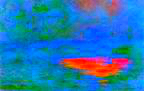

In [114]:
img2

In [115]:
import kmeansLAB
reload(kmeansLAB)

labels, centroids, WCSS = kmeansLAB._kmeans_once(pixlab.as_matrix(), 3)

Iteration  0
Iteration  1
Iteration  2
Iteration  3
Iteration  4
Iteration  5
Iteration  6
Iteration  7
Iteration  8
Iteration  9
Iteration  10


In [116]:
from PIL import Image, ImageDraw

im_full = Image.open("images/7618.jpg")

draw = ImageDraw.Draw(im_full)

fill1 = "rgb(" + str(int(centroids[0][0])) + "," + str(int(centroids[0][1])) + "," + str(int(centroids[0][2])) + ")"
draw.ellipse((20, 20, 100, 100), fill = fill1, outline ='black')

fill1 = "rgb(" + str(int(centroids[1][0])) + "," + str(int(centroids[1][1])) + "," + str(int(centroids[1][2])) + ")"
draw.ellipse((120, 20, 200, 100), fill = fill1, outline ='black')

fill1 = "rgb(" + str(int(centroids[2][0])) + "," + str(int(centroids[2][1])) + "," + str(int(centroids[2][2])) + ")"
draw.ellipse((220, 20, 300, 100), fill = fill1, outline ='black')

im_full.save('test_4.jpg')

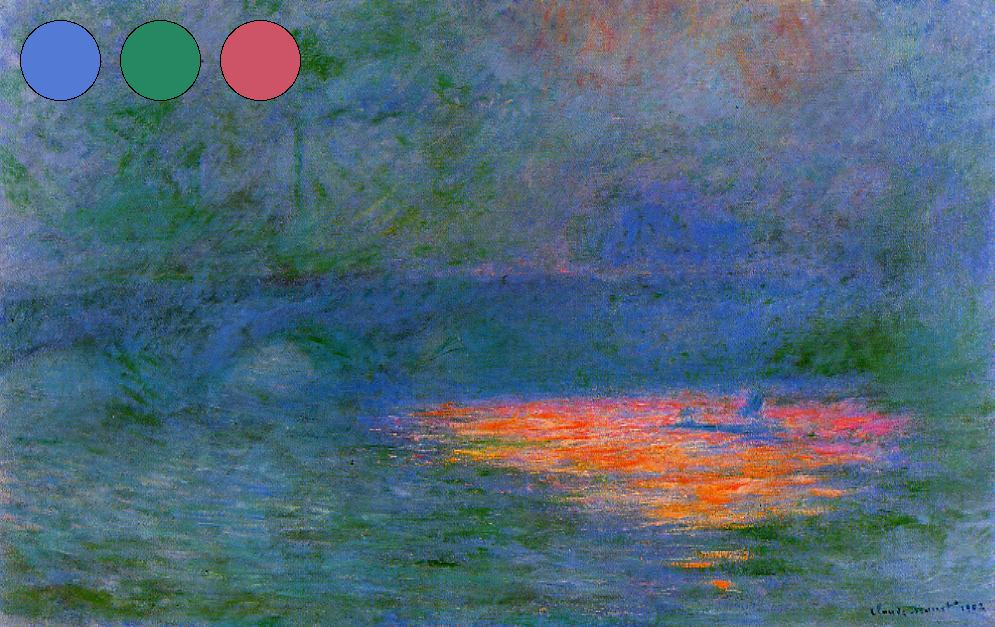

In [117]:
from IPython.display import Image
Image(filename='test_4.jpg')